In [2]:
import pandas as pd
data_path = "C:/Users/onkar/Downloads/ML Tests - 50 Marks/ML Tests/Data.csv"
df = pd.read_csv(data_path)
print(df.head())


  surface;rooms_new;zipcode_new;price_new;latitude;longitude
0           138;4;1060;420000;40.8046725;-73.9634204        
1             130;5;1087;550000;52.3555895;5.0005613        
2              116;5;1061;425000;52.3730438;4.837568        
3              92;5;1035;349511;52.4168952;4.9067666        
4             127;4;1013;1050000;52.396789;4.8766067        


In [3]:
comma_separated_column = None
for column in df.columns:
    if ';' in df[column].iloc[0]:
        comma_separated_column = column
        break

print("Column with comma-separated data:", comma_separated_column)


Column with comma-separated data: surface;rooms_new;zipcode_new;price_new;latitude;longitude


In [4]:
split_data = df[comma_separated_column].str.split(';', expand=True)
split_data.columns = ['surface', 'rooms_new', 'zipcode_new', 'price_new', 'latitude', 'longitude']
print(split_data.head())

  surface rooms_new zipcode_new price_new    latitude    longitude
0     138         4        1060    420000  40.8046725  -73.9634204
1     130         5        1087    550000  52.3555895    5.0005613
2     116         5        1061    425000  52.3730438     4.837568
3      92         5        1035    349511  52.4168952    4.9067666
4     127         4        1013   1050000   52.396789    4.8766067


In [5]:
df = df.drop(columns=[comma_separated_column])
df = pd.concat([split_data, df], axis=1)
print(df.head())

  surface rooms_new zipcode_new price_new    latitude    longitude
0     138         4        1060    420000  40.8046725  -73.9634204
1     130         5        1087    550000  52.3555895    5.0005613
2     116         5        1061    425000  52.3730438     4.837568
3      92         5        1035    349511  52.4168952    4.9067666
4     127         4        1013   1050000   52.396789    4.8766067


In [27]:
df = df.fillna(0)

In [28]:
df.isnull().sum()

surface        0
rooms_new      0
zipcode_new    0
price_new      0
latitude       0
longitude      0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# After trying multiple times took help of chat gpt for this line 
df['surface'] = pd.to_numeric(df['zipcode_new'], errors='coerce')
df['price_new'] = pd.to_numeric(df['price_new'], errors='coerce')


Text(0.5, 1.0, 'Surface vs. Price')

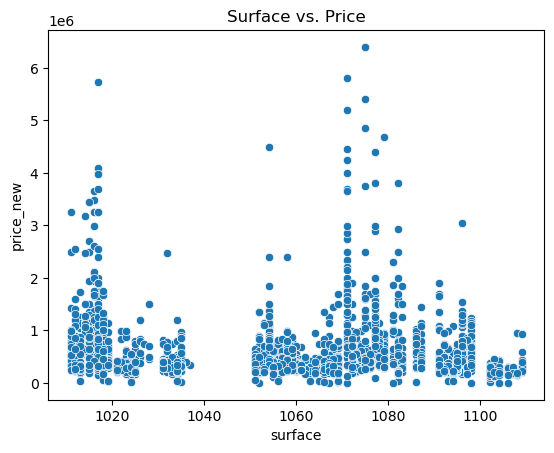

In [97]:
sns.scatterplot(data=df, x='surface', y='price_new')
plt.title('Surface vs. Price')

Text(0.5, 1.0, 'Price Distribution by Zip Code')

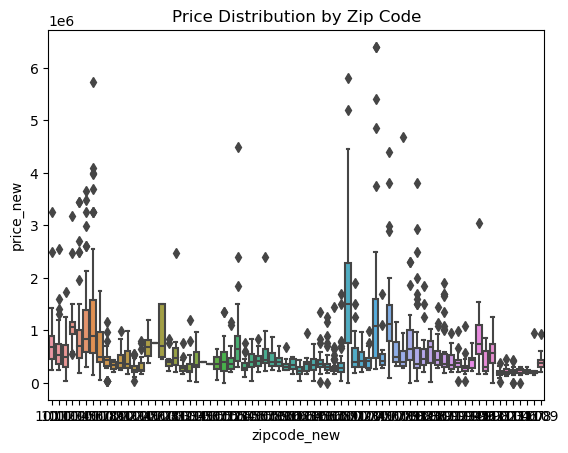

In [31]:
sns.boxplot(data=df, x='zipcode_new', y='price_new')
plt.title('Price Distribution by Zip Code')


Text(0.5, 1.0, 'Distribution of Rooms')

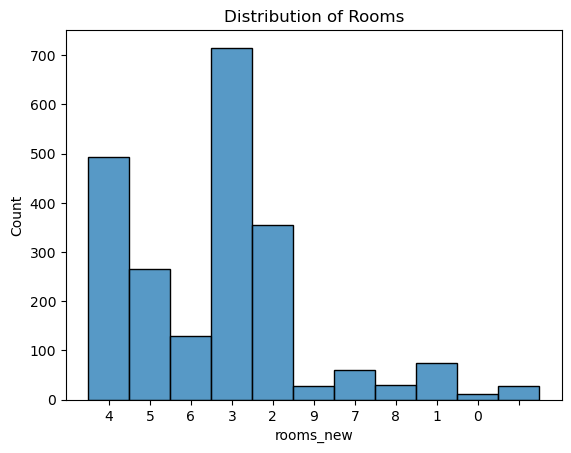

In [33]:
sns.histplot(data=df, x='rooms_new', bins=10)
plt.title('Distribution of Rooms')

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
## Linear Regression 
x = df['surface'].values.reshape(-1,1)
y = df['price_new'].values.reshape(-1,1)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Shape of x_train:", x_train.shape,x_test.shape)
print("Shape of y_train:", y_train.shape,y_test.shape)


Shape of x_train: (1752, 1) (439, 1)
Shape of y_train: (1752, 1) (439, 1)


In [37]:
model = LinearRegression()
model_train = model.fit(x_train,y_train)
print('Model training is complete')

Model training is complete


In [39]:
pred = model.predict(x_test)
pred

array([[ 1.29215258e+06],
       [ 2.45866117e+05],
       [ 2.53182806e+05],
       [ 1.32141934e+06],
       [ 2.53182806e+05],
       [ 7.06817498e+05],
       [ 7.06817498e+05],
       [ 4.14149955e+05],
       [ 3.19033003e+05],
       [ 3.18717493e+06],
       [ 4.06833266e+05],
       [ 8.01934449e+05],
       [ 1.80015920e+05],
       [ 7.28767564e+05],
       [ 2.09282675e+05],
       [ 1.72699232e+05],
       [ 1.26288583e+06],
       [ 4.58050086e+05],
       [ 1.21482412e+05],
       [ 4.14149955e+05],
       [ 7.79984384e+05],
       [ 4.14149955e+05],
       [ 3.92199889e+05],
       [ 1.05070186e+06],
       [ 1.06849034e+05],
       [ 8.82418024e+05],
       [ 4.87316840e+05],
       [ 5.16583595e+05],
       [ 2.17747190e+06],
       [ 1.21482412e+05],
       [ 3.55616446e+05],
       [ 5.45850349e+05],
       [ 2.67816183e+05],
       [ 3.70249823e+05],
       [ 1.80015920e+05],
       [ 8.01934449e+05],
       [ 5.09266906e+05],
       [ 1.80015920e+05],
       [ 1.9

In [40]:
y_test

array([[1375000.],
       [ 300000.],
       [ 415000.],
       [ 685000.],
       [ 185000.],
       [ 425000.],
       [ 895000.],
       [ 200000.],
       [ 475000.],
       [3450000.],
       [ 325000.],
       [ 575000.],
       [ 300000.],
       [ 899000.],
       [ 315000.],
       [ 298000.],
       [1200000.],
       [ 449000.],
       [ 270000.],
       [ 349000.],
       [ 439000.],
       [ 355000.],
       [ 265000.],
       [1105000.],
       [ 350000.],
       [ 925000.],
       [ 450000.],
       [ 400000.],
       [2000000.],
       [ 259000.],
       [ 225000.],
       [ 595000.],
       [ 450000.],
       [ 265000.],
       [ 325000.],
       [ 449000.],
       [ 349000.],
       [ 132500.],
       [ 300000.],
       [ 315000.],
       [1250000.],
       [ 895000.],
       [ 209000.],
       [ 739000.],
       [ 250000.],
       [ 693687.],
       [ 800000.],
       [ 995000.],
       [1399000.],
       [ 270000.],
       [ 350000.],
       [ 875000.],
       [ 289

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt


In [42]:
r2_score(y_test,pred)

0.7325371391652804

In [43]:
mean_squared_error(y_test,pred)

127640607596.42992

In [44]:
sqrt(mean_squared_error(y_test,pred))

357268.2571911895

In [98]:
import joblib

In [100]:
joblib.dump(model,'MLtest_V1.sav')

['MLtest_V1.sav']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [85]:
X = df['zipcode_new'].values.reshape(-1,1)
y = df['price_new'].values.reshape(-1,1)

In [86]:
print("Shape of X_train:", X_train.shape,X_test.shape)
print("Shape of y_train:", y_train.shape,y_test.shape)

Shape of X_train: (1752, 1) (439, 1)
Shape of y_train: (1752, 1) (439, 1)


In [87]:
model = LinearRegression()
model_train = model.fit(x_train,y_train)
print('Model training is complete')

Model training is complete


In [88]:
pred = model.predict(X_test)
pred

array([[416025.98776278],
       [404530.49405579],
       [402997.76156153],
       [404913.67717936],
       [413535.2974596 ],
       [407595.95904432],
       [414876.43839208],
       [411427.79027998],
       [403764.12780866],
       [407787.5506061 ],
       [407595.95904432],
       [403764.12780866],
       [414493.25526851],
       [400123.88813478],
       [401465.02906726],
       [415259.62151564],
       [414876.43839208],
       [399357.52188765],
       [407979.14216789],
       [398591.15564052],
       [414493.25526851],
       [406829.59279719],
       [402422.98687618],
       [402422.98687618],
       [397824.78939338],
       [403189.35312331],
       [399549.11344943],
       [404913.67717936],
       [407404.36748254],
       [414493.25526851],
       [401465.02906726],
       [407212.77592076],
       [413535.2974596 ],
       [415068.02995386],
       [405488.45186471],
       [416025.98776278],
       [402997.76156153],
       [405680.04342649],
       [4148

In [89]:
y_test

array([[ 525000.],
       [1565000.],
       [ 275000.],
       [ 167500.],
       [ 275000.],
       [ 212500.],
       [1800000.],
       [ 850000.],
       [ 599000.],
       [ 600000.],
       [ 325000.],
       [1250000.],
       [ 400000.],
       [ 280000.],
       [ 659000.],
       [ 535000.],
       [ 739000.],
       [ 550000.],
       [ 215000.],
       [ 135000.],
       [ 275000.],
       [ 425000.],
       [ 599000.],
       [ 400000.],
       [ 174000.],
       [ 775000.],
       [ 275000.],
       [ 339000.],
       [ 250000.],
       [ 499000.],
       [ 390000.],
       [ 395000.],
       [ 200000.],
       [ 700000.],
       [ 329000.],
       [ 750000.],
       [ 299000.],
       [ 220000.],
       [ 700000.],
       [ 599000.],
       [ 575000.],
       [ 560000.],
       [ 899000.],
       [ 225000.],
       [ 212500.],
       [ 225000.],
       [ 685000.],
       [ 575000.],
       [ 275000.],
       [1995000.],
       [ 310000.],
       [ 299000.],
       [ 400

In [90]:
r2_score(y_test,pred)

-0.10178487324372343

In [91]:
mean_squared_error(y_test,pred)

444785070889.60974

In [83]:
sqrt(mean_squared_error(y_test,pred))

659972.676613668

In [101]:
joblib.dump(model,'MLtest_V2.sav')

['MLtest_V2.sav']